In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo
import math
import numpy as np
import sys
sys.path.append(r'..\..\bin\Release') 
from EMPY_Field import *
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
sys.path.append('..\model')
from Cylinder_Yaxis_1Layer import Cylinder_Yaxis_1Layer

model=Cylinder_Yaxis_1Layer()

mesh=model.mesh
Draw(mesh)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

enter iccg_solve
Dof= 35925    matrix size= 1797797.0
log1   [0.18579708531386663, 0.1417531270885561, 0.08742031693718581, 0.062339834991642425, 0.05464802077124114, 0.03641367325480998, 0.021548637303092002, 0.009825897321551577, 0.0043988391593382335, 0.0019150265248681097, 0.001185038712158955, 0.0007084466539417904, 0.0005138183532903777, 0.00028350488773843025, 0.00015087486590112197, 0.00012711715439348709, 9.59745684644566e-05, 6.723695966041544e-05, 4.2843284409390776e-05, 1.663431286597293e-05, 1.036793070336755e-05, 4.307421488899904e-06, 1.8601413873350812e-06, 1.0532502006593797e-06, 3.706544633440717e-07, 1.5005135314522336e-07, 9.46487072679952e-08, 4.660427730955785e-08, 1.8793324195889798e-08, 1.3354601015396891e-08, 5.9556620964237396e-09, 2.5840077127435753e-09, 1.611299845299308e-09, 8.826936022008813e-10, 4.350090867893055e-10, 3.152234836496461e-10, 1.3848788601568051e-10, 5.338314411983146e-11, 3.5077454191998456e-11, 1.7148814892022817e-11, 8.048193183912088e-12

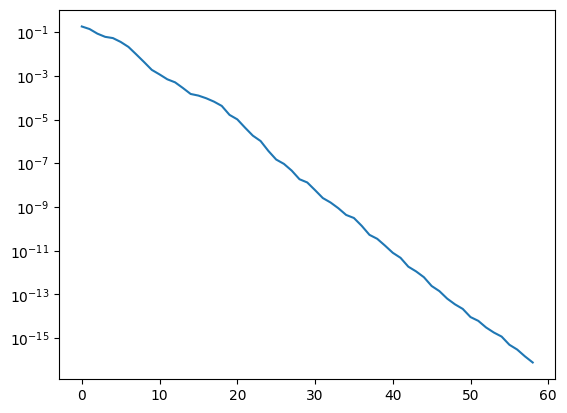

結果のノルム: 1.5481903866989886e-15
power=  74427.5923756032


In [ ]:

symmetric_plane=model.symmetric_plane
Mu=model.Mu
reduced_region=model.reduced_region
total_region=model.total_region
total_boundary=model.total_boundary
reduced_boundary=model.reduced_boundary

Dirichlet=False
feorder=3
coil=UNIF(0,1,0,2)
Av=Afield(coil)
Bv=Bfield(coil)
mu=4.e-7*math.pi
Hv=Bv/mu
As=model.ReducedField(Av, (0,0,0))
Bs=model.ReducedField(Bv, (0,0,0))

if Dirichlet==True:
    fesA=HCurl(mesh, order=feorder, dirichlet=symmetric_plane+'|'+reduced_boundary, nograds=True)
else:
    fesA=HCurl(mesh, order=feorder, dirichlet=symmetric_plane, nograds=True) 
A,N = fesA.TnT() 
gfA = GridFunction(fesA)
normal = specialcf.normal(mesh.dim)

a= BilinearForm(fesA)
a +=1/Mu*curl(A)*curl(N)*dx
with TaskManager():
    a.Assemble()

# Calculate Dirichlet condition terms
gfA.Set(Av, BND, mesh.Boundaries(total_boundary))
f = LinearForm(fesA)
f +=1/Mu*curl(gfA)*curl(N)*dx(reduced_region)
with TaskManager():
    f.Assemble()    
#remove components of the Dirichlet boundary
fcut = np.array(f.vec.FV())[fesA.FreeDofs()]
np.array(f.vec.FV(), copy=False)[fesA.FreeDofs()] = fcut

# Add Neumann condition terms
f += Cross(N.Trace(),Hv)*normal*ds(total_boundary)
with TaskManager():
    f.Assemble()
gfA = GridFunction(fesA)   #Clear gfA
gfA=solver.iccg_solve(fesA, gfA, a, f.vec.FV(), tol=1.e-16, max_iter=200, accel_factor=1.1, complex=False, logplot=True) 

fesAt=HCurl(mesh, order=feorder, definedon=total_region, dirichlet=symmetric_plane, nograds=True)
fesAr=HCurl(mesh, order=feorder, definedon=reduced_region, dirichlet=symmetric_plane, nograds=True)
At=GridFunction(fesAt)
Arr=GridFunction(fesAr)
Axr=GridFunction(fesAr)
At.Set(gfA,VOL, definedon=total_region)
Arr.Set(gfA,VOL, definedon=reduced_region)
Axr.Set(Av, BND, mesh.Boundaries(total_boundary))

Bt=curl(At)
Ar=Arr-Axr
Br=curl(Arr)-curl(Axr)

print("**** A field ****")
Afield=At+Ar+As
Draw (Afield, mesh, order=3, min=-1.0, max=1.0, deformation=False)  
print("**** B field ****")
Bfield=Bt+Br+Bs
Draw (Bfield, mesh, order=3, min=0., max=1.2, deformation=False) 

mip = mesh(0,0,0)
print("center magnetic field = ", Bfield(mip))


Dof= 35925    matrix size= 1797797.0
log1   [0.18579708531386663, 0.1417531270885561, 0.08742031693718581, 0.062339834991642425, 0.05464802077124114, 0.03641367325480998, 0.021548637303092002, 0.009825897321551577, 0.0043988391593382335, 0.0019150265248681097, 0.001185038712158955, 0.0007084466539417904, 0.0005138183532903777, 0.00028350488773843025, 0.00015087486590112197, 0.00012711715439348709, 9.59745684644566e-05, 6.723695966041544e-05, 4.2843284409390776e-05, 1.663431286597293e-05, 1.036793070336755e-05, 4.307421488899904e-06, 1.8601413873350812e-06, 1.0532502006593797e-06, 3.706544633440717e-07, 1.5005135314522336e-07, 9.46487072679952e-08, 4.660427730955785e-08, 1.8793324195889798e-08, 1.3354601015396891e-08, 5.9556620964237396e-09, 2.5840077127435753e-09, 1.611299845299308e-09, 8.826936022008813e-10, 4.350090867893055e-10, 3.152234836496461e-10, 1.3848788601568051e-10, 5.338314411983146e-11, 3.5077454191998456e-11, 1.7148814892022817e-11, 8.048193183912088e-12, 4.720821070282073e-12, 1.8575847352827094e-12, 1.1284740517190157e-12, 6.142726422871077e-13, 2.4235020789152603e-13, 1.4083822150323837e-13, 6.391951204043324e-14, 3.5064036501707764e-14, 2.1639856757989585e-14, 9.153095193287351e-15, 6.1314418135387896e-15, 3.057658048823744e-15, 1.7945249019598714e-15, 1.1688547236252491e-15, 4.933072235812015e-16, 2.9829556591780347e-16, 1.4520116818590964e-16, 7.618846911860992e-17]

Dirichlet=False

center magnetic field =  (7.236731087298752e-08, 1.8331805495970313, 2.138892077548991e-15)

B field
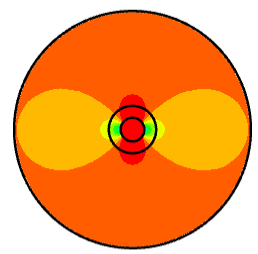

Dirichlet=True

center magnetic field =  (7.003348044725892e-08, 1.8034265356606107, -7.107378125217459e-16)

B field
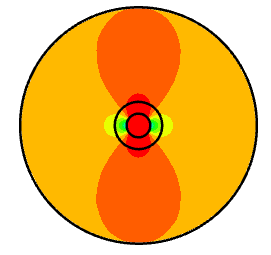